In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Loading the Dataset

In [2]:
# Load dataset ('supermakerket_sales.csv')
df = pd.read_csv('supermarket_sales.csv')

# Preview the dataset
print(df.head())

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

Explore and Cleaning the Data

Check for missing values, duplicates, and other inconsistencies.

In [3]:
# Check for null values
print(df.isnull().sum())

# Check for duplicates
df.drop_duplicates(inplace=True)

# Data types
print(df.dtypes)


Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64
Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gros

Descriptive of statistics

In [4]:
# Summary statistics
print(df.describe())

# Total sales per product line
product_sales = df.groupby('Product line')['Total'].sum()
print(product_sales)


        Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.131498e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.761905e+00      5.924875   

1. Customer Demographics Analysis
sales by gender and customer type to understand demographic patterns.

In [7]:
# Sales distribution by gender
gender_sales = df.groupby('Gender')['Total'].sum()

# Sales distribution by customer type
customer_type_sales = df.groupby('Customer type')['Total'].sum()

# Display the results
print(gender_sales)
print(customer_type_sales)


Gender
Female    167882.925
Male      155083.824
Name: Total, dtype: float64
Customer type
Member    164223.444
Normal    158743.305
Name: Total, dtype: float64


2. Sales Performance by Branch and City.
Analyze total sales for each branch and city, which may reveal performance differences based on location.

In [8]:
# Sales by branch
branch_sales = df.groupby('Branch')['Total'].sum()

# Sales by city
city_sales = df.groupby('City')['Total'].sum()

# Display the results
print(branch_sales)
print(city_sales)


Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64
City
Mandalay     106197.6720
Naypyitaw    110568.7065
Yangon       106200.3705
Name: Total, dtype: float64



3. Sales Trends by Date and Time of Day.

Analyze sales patterns over different dates and times of the day.

In [9]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sales by day of the week
df['Day of Week'] = df['Date'].dt.day_name()
day_sales = df.groupby('Day of Week')['Total'].sum()

# Sales by hour of the day
df['Hour'] = pd.to_datetime(df['Time']).dt.hour
hour_sales = df.groupby('Hour')['Total'].sum()

# Display the results
print(day_sales)
print(hour_sales)


Day of Week
Friday       43926.3405
Monday       37899.0780
Saturday     56120.8095
Sunday       44457.8925
Thursday     45349.2480
Tuesday      51482.2455
Wednesday    43731.1350
Name: Total, dtype: float64
Hour
10    31421.4810
11    30377.3295
12    26065.8825
13    34723.2270
14    30828.3990
15    31179.5085
16    25226.3235
17    24445.2180
18    26030.3400
19    39699.5130
20    22969.5270
Name: Total, dtype: float64


<ipython-input-9-31c319e0c23e>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time']).dt.hour



4. Product Line Analysis.
This will include total sales, average price, and quantities sold per product line.

In [10]:
# Total sales and average unit price by product line
product_line_sales = df.groupby('Product line')['Total'].sum()
average_price = df.groupby('Product line')['Unit price'].mean()
quantity_sold = df.groupby('Product line')['Quantity'].sum()

# Display the results
print(product_line_sales)
print(average_price)
print(quantity_sold)


Product line
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Food and beverages        56144.8440
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Sports and travel         55122.8265
Name: Total, dtype: float64
Product line
Electronic accessories    53.551588
Fashion accessories       57.153652
Food and beverages        56.008851
Health and beauty         54.854474
Home and lifestyle        55.316937
Sports and travel         56.993253
Name: Unit price, dtype: float64
Product line
Electronic accessories    971
Fashion accessories       902
Food and beverages        952
Health and beauty         854
Home and lifestyle        911
Sports and travel         920
Name: Quantity, dtype: int64



5. Payment Method Preferences,
understanding which payment methods are most commonly used by customers.

In [11]:
# Frequency of each payment method
payment_method_counts = df['Payment'].value_counts()

# Display the result
print(payment_method_counts)


Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64



6. Sales Performance Based on Rating.
Analyze average sales and frequency by rating score.

In [12]:
# Sales distribution by rating
rating_sales = df.groupby('Rating')['Total'].mean()

# Display the result
print(rating_sales)


Rating
4.0     362.410364
4.1     211.128441
4.2     421.632273
4.3     331.006083
4.4     395.092147
           ...    
9.6     328.956353
9.7     238.028250
9.8     261.943500
9.9     363.933281
10.0    416.070900
Name: Total, Length: 61, dtype: float64


Customer Demographics (Gender and Customer Type)

<ipython-input-14-8402799379fe>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_sales.index, y=gender_sales.values, palette="Blues")


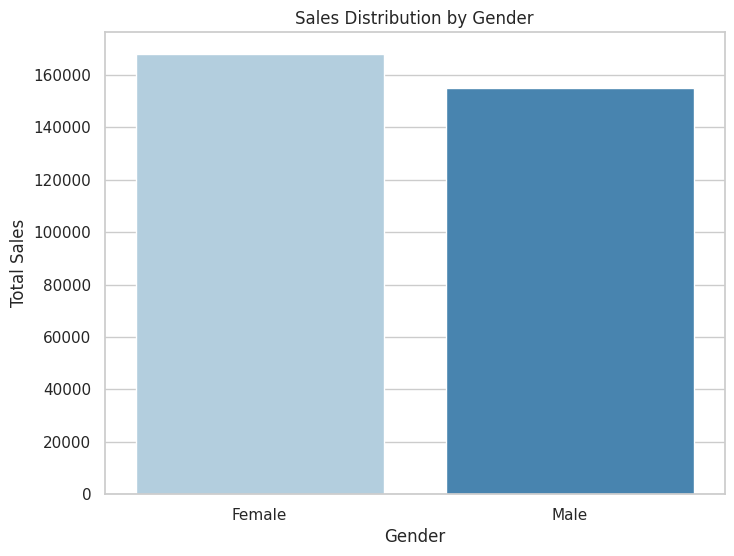

<ipython-input-14-8402799379fe>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_type_sales.index, y=customer_type_sales.values, palette="Greens")


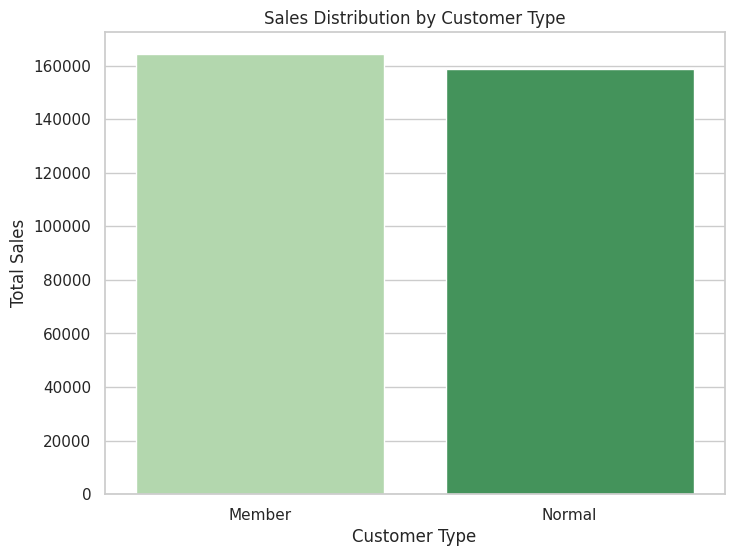

In [14]:

import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_theme(style="whitegrid")

# Gender Sales Distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_sales.index, y=gender_sales.values, palette="Blues")
plt.title("Sales Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Sales")
plt.show()

# Customer Type Sales Distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=customer_type_sales.index, y=customer_type_sales.values, palette="Greens")
plt.title("Sales Distribution by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Total Sales")
plt.show()



 Sales Performance by Branch and City

<ipython-input-15-9c475afdcead>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=branch_sales.index, y=branch_sales.values, palette="Purples")


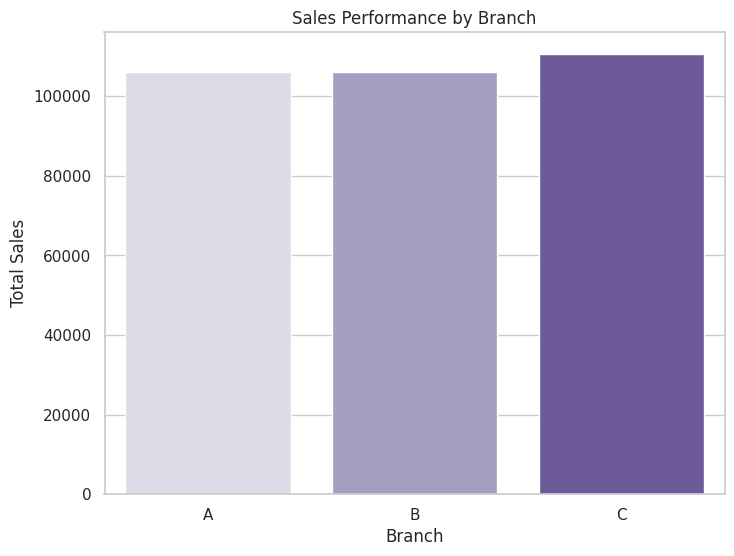

<ipython-input-15-9c475afdcead>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_sales.index, y=city_sales.values, palette="Oranges")


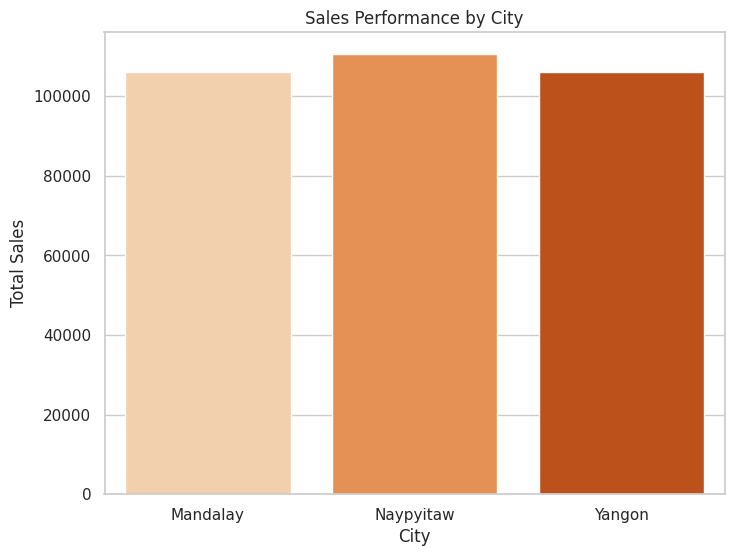

In [15]:
# Branch Sales Distribution
branch_sales = df.groupby('Branch')['Total'].sum()
plt.figure(figsize=(8, 6))
sns.barplot(x=branch_sales.index, y=branch_sales.values, palette="Purples")
plt.title("Sales Performance by Branch")
plt.xlabel("Branch")
plt.ylabel("Total Sales")
plt.show()

# City Sales Distribution
city_sales = df.groupby('City')['Total'].sum()
plt.figure(figsize=(8, 6))
sns.barplot(x=city_sales.index, y=city_sales.values, palette="Oranges")
plt.title("Sales Performance by City")
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.show()



Sales Trends by Day of the Week and Hour

<ipython-input-16-b76098326193>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_sales.index, y=day_sales.values, palette="coolwarm")


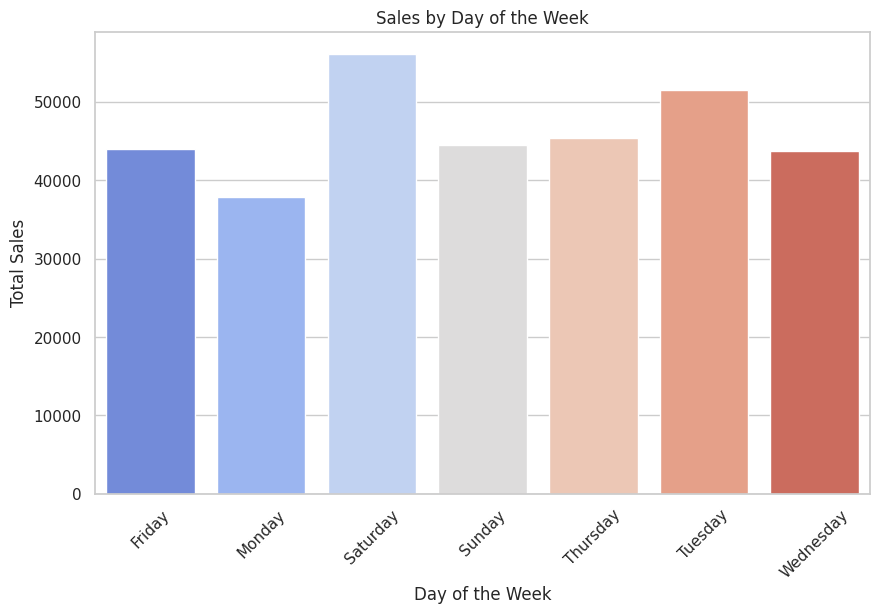

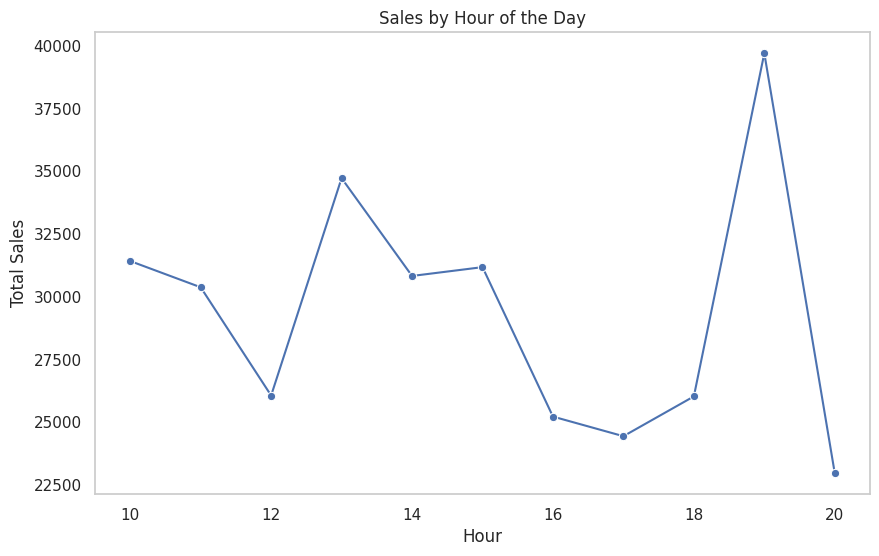

In [16]:
# Sales by Day of the Week
day_sales = df.groupby('Day of Week')['Total'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=day_sales.index, y=day_sales.values, palette="coolwarm")
plt.title("Sales by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

# Sales by Hour of the Day
hour_sales = df.groupby('Hour')['Total'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=hour_sales.index, y=hour_sales.values, marker="o", color="b")
plt.title("Sales by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Total Sales")
plt.grid()
plt.show()



Product Line Analysis

<ipython-input-17-04712de15437>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_line_sales.index, y=product_line_sales.values, palette="Set2")


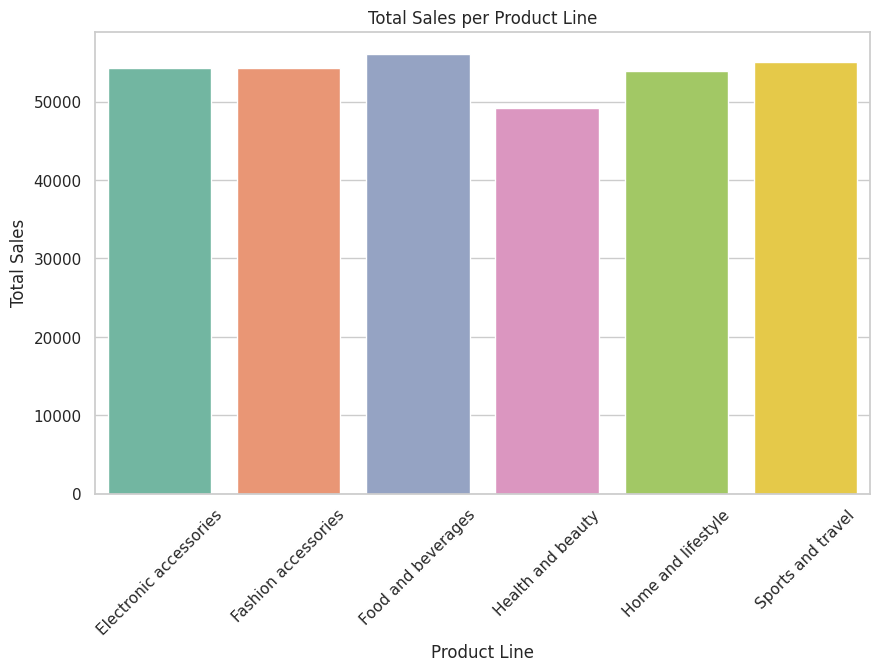

In [17]:
# Product Line Sales
product_line_sales = df.groupby('Product line')['Total'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=product_line_sales.index, y=product_line_sales.values, palette="Set2")
plt.title("Total Sales per Product Line")
plt.xlabel("Product Line")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()



Payment Method Preferences

<ipython-input-18-37fe4c503a0a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_method_counts.index, y=payment_method_counts.values, palette="Set1")


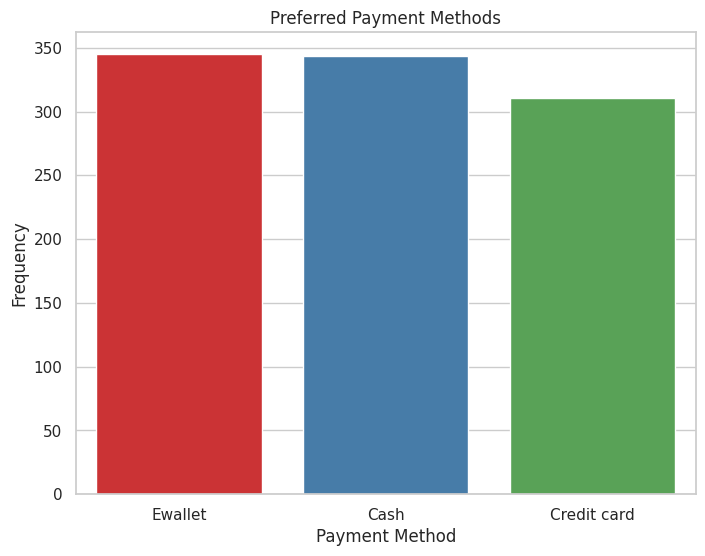

In [18]:
# Payment Method Distribution
payment_method_counts = df['Payment'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=payment_method_counts.index, y=payment_method_counts.values, palette="Set1")
plt.title("Preferred Payment Methods")
plt.xlabel("Payment Method")
plt.ylabel("Frequency")
plt.show()



Sales Performance Based on Rating

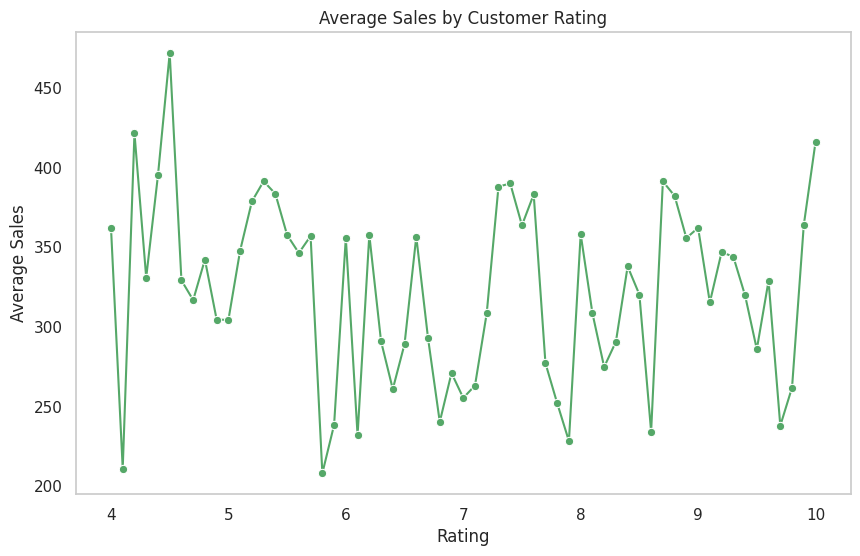

In [19]:
# Rating vs Average Sales
rating_sales = df.groupby('Rating')['Total'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=rating_sales.index, y=rating_sales.values, marker="o", color="g")
plt.title("Average Sales by Customer Rating")
plt.xlabel("Rating")
plt.ylabel("Average Sales")
plt.grid()
plt.show()




**Summary and Recommendations**

Based on the sales analysis, here are some strategic recommendations for optimizing performance:

1. Customer Demographics Insights
Female Customers: Since female customers contribute slightly more to sales, consider targeted marketing campaigns for female customers, such as loyalty programs or product bundles that cater specifically to their preferences.
Membership Program: With members showing higher spending than regular customers, focus on expanding the membership program. Highlight exclusive benefits like discounts, special promotions, and early access to products to convert more customers into members.
2. Branch and City Sales Performance
Branch Strategy: Identify high-performing branches and examine what specific factors contribute to their success. For lower-performing branches, assess if factors like product assortment, in-store experience, or staff training could be optimized.
City-Specific Marketing: Tailor marketing strategies to each city’s unique consumer behaviors and trends. For example, focus on citywide events or cultural influences that align with the customer preferences in each location.
3. Sales Trends by Day and Time
Day-Based Promotions: If certain days, like weekends, have higher sales, consider increasing inventory and staff during these times. For slower days, promote flash sales or limited-time offers to drive traffic and increase sales.
Peak Hour Adjustments: Use the insights from peak sales hours to adjust staffing and stock levels. Offering happy-hour discounts or special deals during off-peak hours may also help balance traffic throughout the day.
4. Product Line Optimization
Top-Selling Products: Focus on maintaining adequate stock levels for high-revenue product lines. Promote these product lines in customer communication and cross-sell related products.
Low-Performing Product Lines: Assess whether low-performing product lines could benefit from targeted discounts, improved display positioning, or a review of pricing strategies.
5. Payment Method Preferences
Preferred Payment Method: Since certain payment methods are more popular, consider offering exclusive discounts or reward points for those methods to encourage customers to shop more frequently. Additionally, providing a seamless experience with these payment options could enhance customer satisfaction.
6. Customer Rating Insights
Customer Experience Improvements: If ratings affect sales significantly, focus on collecting feedback for improvement. Invest in training for customer-facing employees to enhance service quality and consistently monitor satisfaction levels.

**Overall Strategy Recommendations**

1. Targeted Marketing Campaigns: Using demographic data, create more personalized marketing content to engage specific groups of customers. Gender-based or membership-driven campaigns could have a substantial impact.
2. Operational Efficiency: Use data-driven insights on sales trends by day and time to improve operational efficiency, from staffing to inventory management, maximizing revenue potential.
3. Continuous Data Analysis: Conduct ongoing analysis, regularly updating strategies based on the latest data trends to ensure the store stays aligned with changing customer behaviors.